In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
df3=pd.read_csv("diabetes.csv")
df1=pd.read_csv("diabetes1.csv")
df2=pd.read_csv("diabetes2.csv")
df2.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
df=pd.concat([df1,df2,df3],ignore_index=True)

In [6]:
df.shape

(3536, 9)

In [7]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3531,2,75,64,24,55,29.7,0.370,33,0
3532,8,179,72,42,130,32.7,0.719,36,1
3533,6,85,78,0,0,31.2,0.382,42,0
3534,0,129,110,46,130,67.1,0.319,26,1
3535,2,81,72,15,76,30.1,0.547,25,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3536 entries, 0 to 3535
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               3536 non-null   int64  
 1   Glucose                   3536 non-null   int64  
 2   BloodPressure             3536 non-null   int64  
 3   SkinThickness             3536 non-null   int64  
 4   Insulin                   3536 non-null   int64  
 5   BMI                       3536 non-null   float64
 6   DiabetesPedigreeFunction  3536 non-null   float64
 7   Age                       3536 non-null   int64  
 8   Outcome                   3536 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 248.8 KB


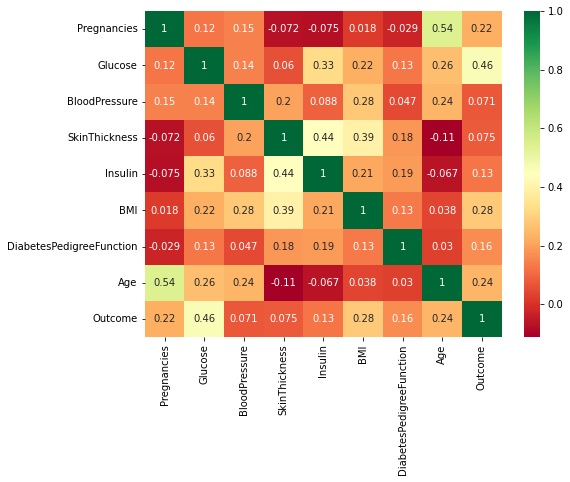

In [9]:
plt.figure(figsize=(8,6))
x=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000,3536.000000
mean,3.764989,121.057410,69.128111,20.761878,80.056561,32.105939,0.471341,33.155826,0.345023
std,3.333585,32.018238,19.255778,16.034523,112.931080,8.033939,0.326859,11.771963,0.475443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.500000,32.100000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.624500,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes_df_copy = df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [13]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                    0
Glucose                       23
BloodPressure                160
SkinThickness               1027
Insulin                     1704
BMI                           50
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


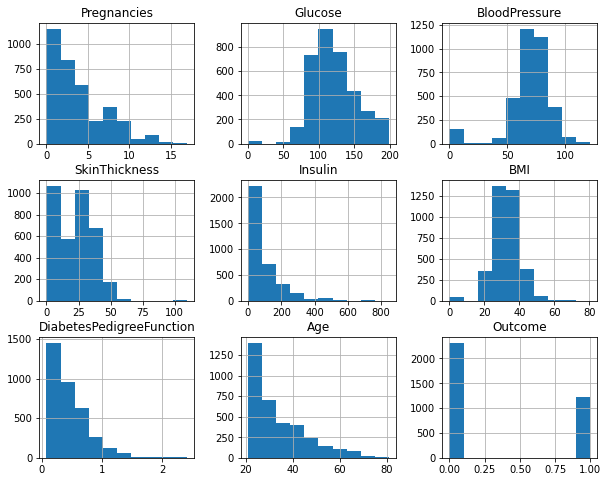

In [14]:
p = df.hist(figsize = (10,8))

In [15]:
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)

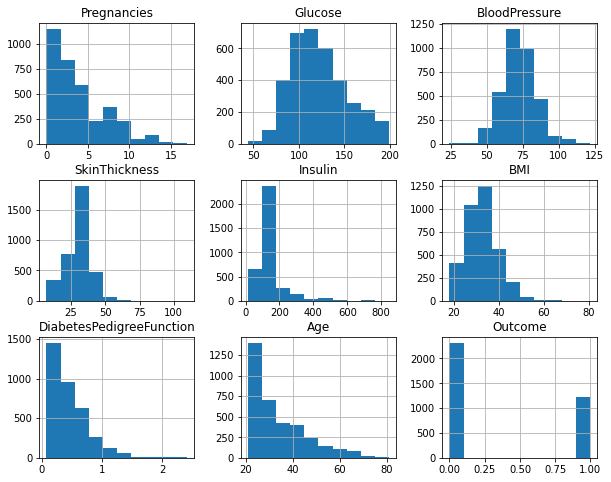

In [16]:
p = diabetes_df_copy.hist(figsize = (10,8))

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df["Outcome"].value_counts()

0    2316
1    1220
Name: Outcome, dtype: int64

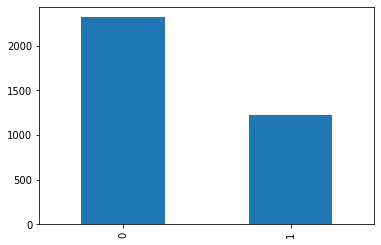

In [19]:
p=df.Outcome.value_counts().plot(kind="bar")

C:\Users\Ramakrishna\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


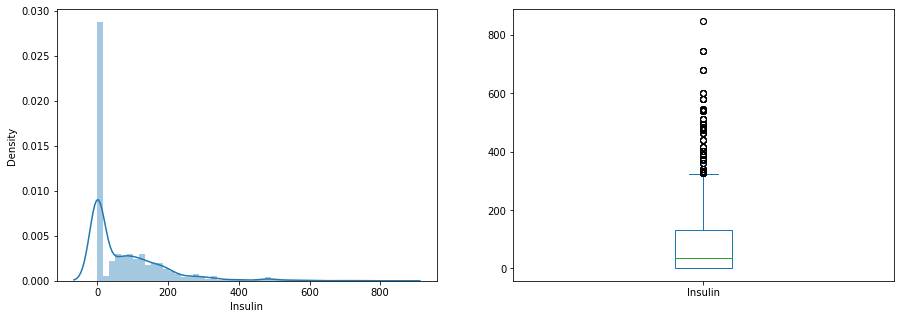

In [20]:
plt.subplot(121), sns.distplot(df['Insulin'])
plt.subplot(122),df['Insulin'].plot.box(figsize=(15,5))
plt.show()

In [21]:
X =df.drop(columns = 'Outcome', axis=1)
Y = df['Outcome']


In [22]:
# STandardsing the data
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.67054763  0.84159538  0.14916537 ...  0.18599499  0.47629333
   1.43107457]
 [-0.82955133 -1.12631148 -0.16247348 ... -0.68543185 -0.36822586
  -0.18315813]
 [ 1.27058721  1.93487696 -0.26635309 ... -1.09624737  0.61398667
  -0.09819852]
 ...
 [ 0.67054763 -1.12631148  0.46080422 ... -0.11277993 -0.27337044
   0.75139765]
 [-1.12957112  0.24809966  2.12287809 ...  4.3563949  -0.46614112
  -0.60795621]
 [-0.52953154 -1.25125795  0.14916537 ... -0.24971843  0.23150516
  -0.69291583]]


In [23]:
X = standardized_data
Y = df['Outcome']

In [24]:
print(x)

AxesSubplot(0.125,0.125;0.62x0.755)


In [25]:
print(Y)

0       1
1       0
2       1
3       0
4       1
       ..
3531    0
3532    1
3533    0
3534    1
3535    0
Name: Outcome, Length: 3536, dtype: int64


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)

In [27]:
print(X.shape, X_train.shape, X_test.shape)

(3536, 8) (2828, 8) (708, 8)


In [28]:
# SVM
from sklearn import svm

In [29]:
classifier = svm.SVC(kernel='linear')

In [30]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [32]:
# accuracy score on the training data
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [33]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7690947666195191


In [34]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [35]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7937853107344632


In [36]:
# Logistic regression
lr=LogisticRegression()
lr.fit(X_train, Y_train)



LogisticRegression()

In [41]:
X_train_prediction = lr.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on lr  training data : ', training_data_accuracy)
X_test_prediction = lr.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on lr the test data : ', test_data_accuracy)

Accuracy score on lr  training data :  0.7779349363507779
Accuracy score on lr the test data :  0.7951977401129944


In [42]:
#  **  KNN **** 
KNN=KNeighborsClassifier()
KNN.fit(X_train, Y_train)


KNeighborsClassifier()

In [48]:
X_train_prediction = KNN.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on KNN  training data : ', training_data_accuracy)
X_test_prediction = KNN.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on KNN the test data : ', test_data_accuracy)

Accuracy score on KNN  training data :  0.9766619519094767
Accuracy score on KNN the test data :  0.8954802259887006


In [44]:
#  DECISION TREE CLASSIFIER
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [45]:
X_train_prediction = DTC.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on DTC  training data : ', training_data_accuracy)
X_test_prediction = DTC.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on DTC the test data : ', test_data_accuracy)

Accuracy score on lr  training data :  1.0
Accuracy score on lr the test data :  1.0


In [46]:
#  RANDOM FOREST CLASSIFIER
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)

RandomForestClassifier()

In [47]:
X_train_prediction = RFC.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score on RFC  training data : ', training_data_accuracy)
X_test_prediction = RFC.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on RFC the test data : ', test_data_accuracy)

Accuracy score on lr  training data :  1.0
Accuracy score on lr the test data :  1.0


In [50]:
#  MAKING PREDICTIVE SYSTEM

input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


C:\Users\Ramakrishna\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
